Dataset Shape: (74681, 4)

Columns: Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

Missing values:
 2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

Sentiment Distribution:
 Sentiment
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64


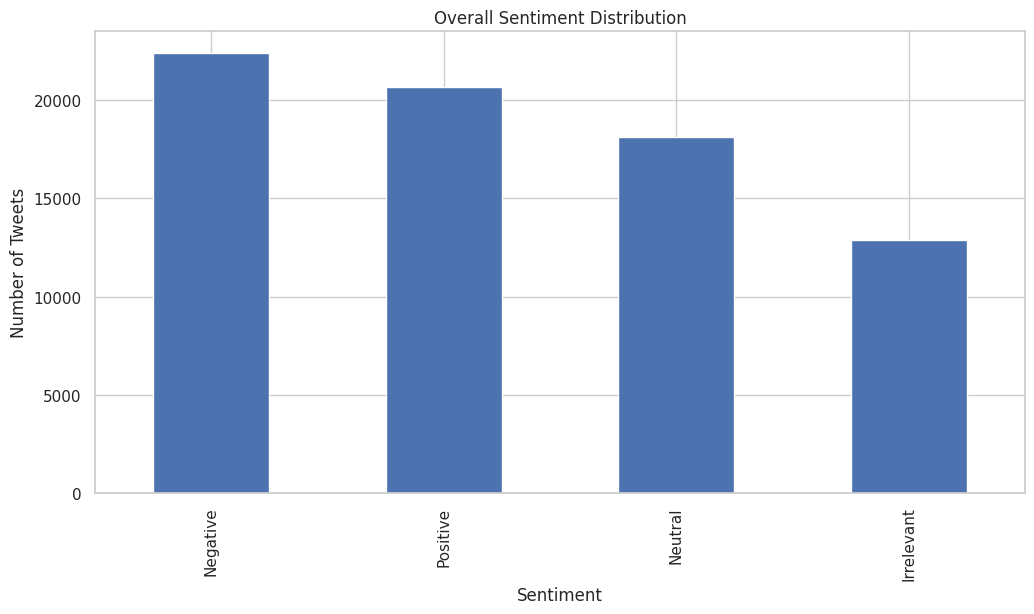

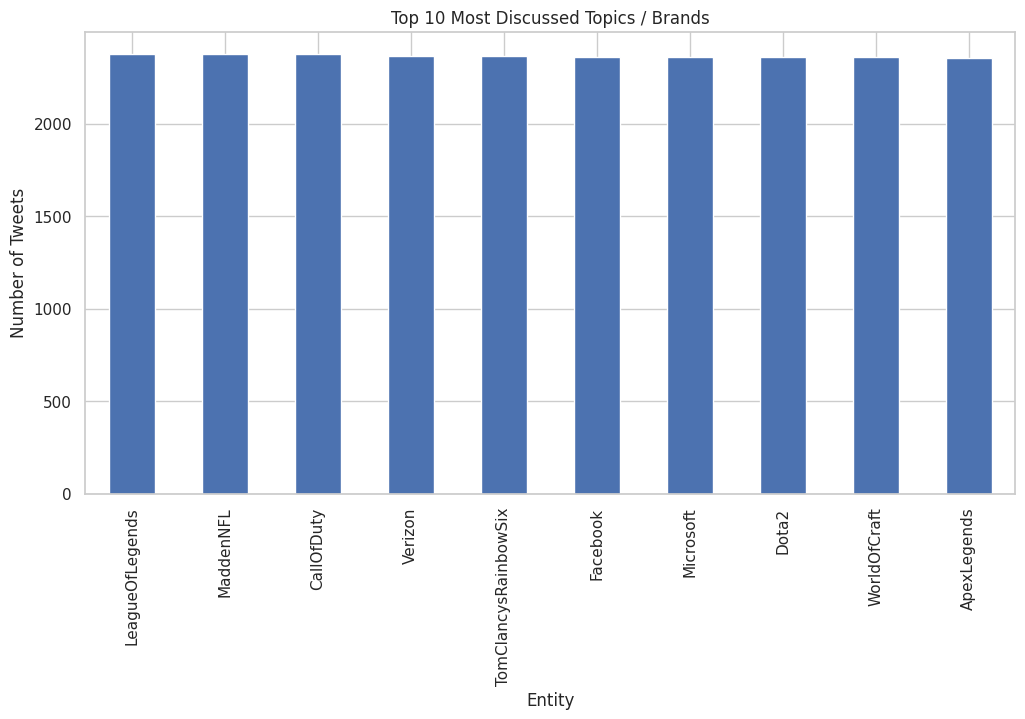


Brand-wise Sentiment Table:
 Sentiment             Irrelevant  Negative  Neutral  Positive
Entity                                                       
CallOfDuty                   672       883      375       446
LeagueOfLegends              312       632      818       615
MaddenNFL                     90      1694      197       396
TomClancysRainbowSix          96      1115      640       513
Verizon                      180      1092      565       528


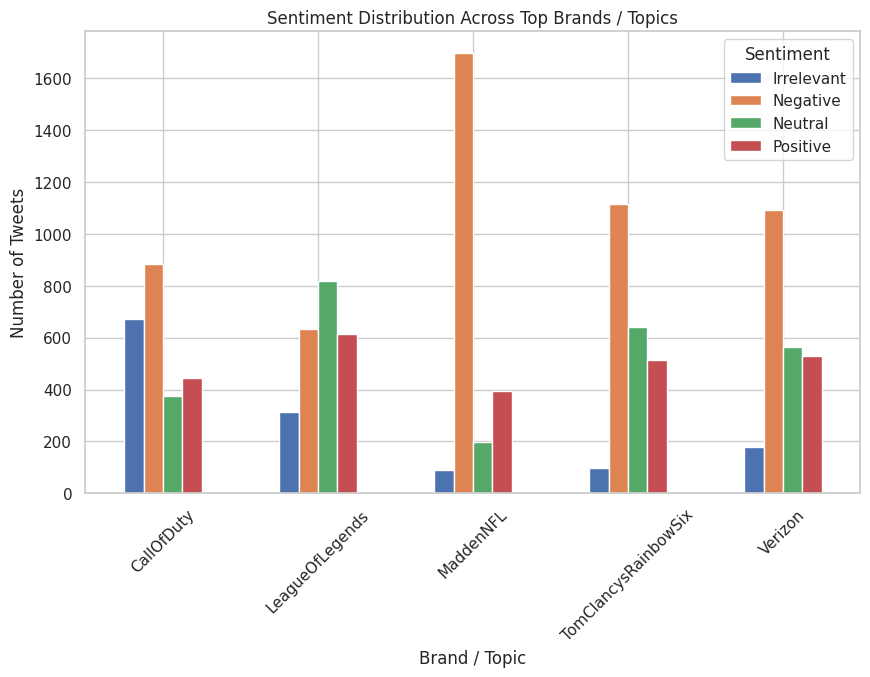

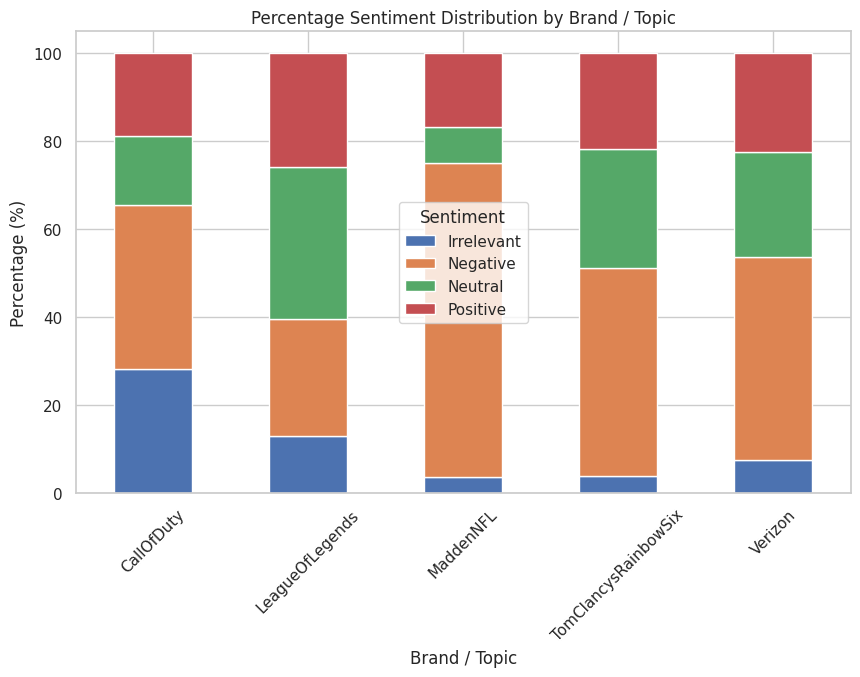


Key Insights:
- Public sentiment varies across brands and topics.
- Some brands receive higher negative sentiment, indicating dissatisfaction.
- Neutral sentiment dominates many discussions.
- Positive sentiment reflects favorable public opinion.


In [5]:
# =========================================
# Task 4: Sentiment Analysis & Visualization
# =========================================

import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv("/content/twitter_training.csv")

# 2. Basic inspection
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nMissing values:\n", df.isnull().sum())

# Rename columns based on inspection
df = df.rename(columns={
    'Positive': 'Sentiment',
    'im getting on borderlands and i will murder you all ,': 'Tweet',
    'Borderlands': 'Entity'
})

# 3. Data cleaning
df = df.dropna(subset=["Tweet", "Sentiment"])
df["Sentiment"] = df["Sentiment"].str.capitalize()

print("\nSentiment Distribution:\n", df["Sentiment"].value_counts())

# 4. Overall Sentiment Distribution Visualization
plt.figure()
df["Sentiment"].value_counts().plot(kind="bar")
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()

# 5. Top 10 Most Discussed Brands / Topics
top_entities = df["Entity"].value_counts().head(10)

plt.figure()
top_entities.plot(kind="bar")
plt.title("Top 10 Most Discussed Topics / Brands")
plt.xlabel("Entity")
plt.ylabel("Number of Tweets")
plt.show()

# 6. Sentiment Analysis for Top 5 Brands / Topics
top_5_entities = df["Entity"].value_counts().head(5).index
filtered_df = df[df["Entity"].isin(top_5_entities)]

entity_sentiment = (
    filtered_df
    .groupby(["Entity", "Sentiment"])
    .size()
    .unstack(fill_value=0)
)

print("\nBrand-wise Sentiment Table:\n", entity_sentiment)

# 7. Brand-wise Sentiment Visualization
entity_sentiment.plot(kind="bar", figsize=(10,6))
plt.title("Sentiment Distribution Across Top Brands / Topics")
plt.xlabel("Brand / Topic")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.show()

# 8. Percentage-based Sentiment Analysis
entity_sentiment_percentage = entity_sentiment.div(entity_sentiment.sum(axis=1), axis=0) * 100

entity_sentiment_percentage.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Percentage Sentiment Distribution by Brand / Topic")
plt.xlabel("Brand / Topic")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.show()

# 9. Final Insights
print("\nKey Insights:")
print("- Public sentiment varies across brands and topics.")
print("- Some brands receive higher negative sentiment, indicating dissatisfaction.")
print("- Neutral sentiment dominates many discussions.")
print("- Positive sentiment reflects favorable public opinion.")
